Prediction of Data from Kaggle

In [121]:
# Importing all library to use
# for later
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline

In [188]:
# Reading data from file to proess
# file is at same location where we have this python code sheet
# Using panda lib to read file
trainData = pd.read_csv("train.csv")

In [189]:
# Informtion about dataset 
# Number of colums
# how many rows dataset have
# how mnay not-null value each column have
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [190]:
# first five rows to view
# change value from 5 to any number to view more data
trainData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [191]:
# Provide statistics information about quantitative data
# 
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2206d048>,
      dtype=object)

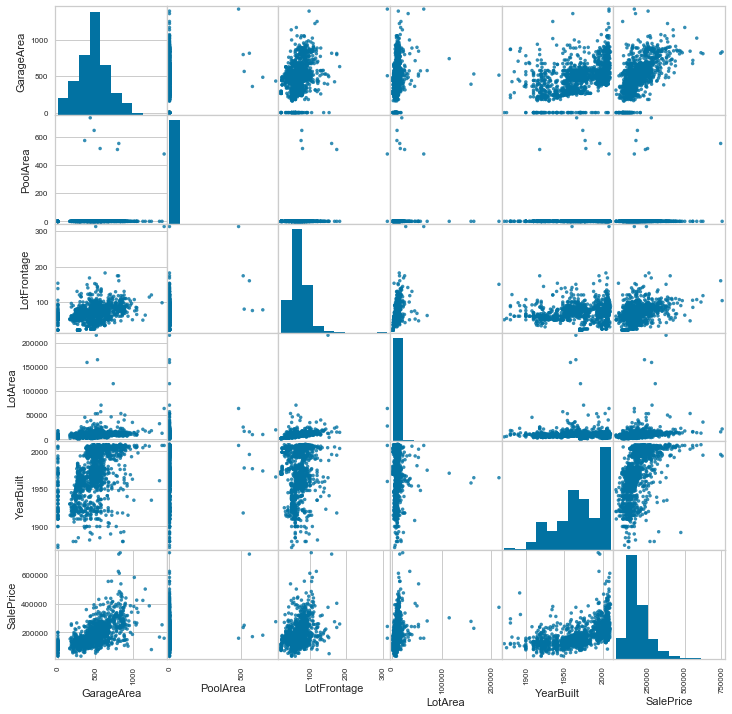

In [192]:
# Lets find how feature are dependednt on each othere
# how Y -> salesprice is dependet on X -> 'GarageArea','PoolArea','LotFrontage','LotArea','YearBuilt'

# Scatter diagram for this purpose
from pandas.plotting import scatter_matrix

# Create feature to be added for scatter
attributes=['GarageArea','PoolArea','LotFrontage','LotArea','YearBuilt','SalePrice']

# Now create scatter diagram
scatter_matrix(trainData[attributes],alpha=0.8,figsize=(12,12))

In [193]:
# Extract features on which prediction need to be done
# we have take 5 features initially to start with
X_train = trainData[['PoolArea','GarageArea','LotFrontage',
                     'LotArea','YearBuilt']] 

X_train.head()
X_train.describe()

,PoolArea,GarageArea,LotFrontage,LotArea,YearBuilt
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000
mean,2.758904,472.980137,70.049958,10516.828082,1971.267808
std,40.177307,213.804841,24.284752,9981.264932,30.202904
min,0.000000,0.000000,21.000000,1300.000000,1872.000000
25%,0.000000,334.500000,59.000000,7553.500000,1954.000000
50%,0.000000,480.000000,69.000000,9478.500000,1973.000000
75%,0.000000,576.000000,80.000000,11601.500000,2000.000000
max,738.000000,1418.000000,313.000000,215245.000000,2010.000000


In [194]:
X_train.info()

# Lot frontag has only 1201 NOT-NULL value 
# As algorithm do not take not-null values , we need to fill these null values
# One of the way is to input NULL values with mean so that distribution of data do not changed
X_train['LotFrontage'].fillna(70,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
PoolArea       1460 non-null int64
GarageArea     1460 non-null int64
LotFrontage    1201 non-null float64
LotArea        1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: float64(1), int64(4)
memory usage: 57.1 KB


/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [195]:
X_train.info()
Y_train = trainData['SalePrice']

Y_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
PoolArea       1460 non-null int64
GarageArea     1460 non-null int64
LotFrontage    1460 non-null float64
LotArea        1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: float64(1), int64(4)
memory usage: 57.1 KB


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [196]:
print(X_train['YearBuilt'].head(2))

0    2003
1    1976
Name: YearBuilt, dtype: int64


In [198]:
# Using lambda function to chage yearuilt 
#

X_train['YearBuilt'] = X_train['YearBuilt'].apply(lambda x: (2019-x))
#X_train['YearBuilt'] = 2018 - X_train['YearBuilt']

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [199]:
print(X_train['YearBuilt'].head(2))

0    16
1    43
Name: YearBuilt, dtype: int64


In [200]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(X_train, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

106743.7638315447
[  66.64920909  151.72989178  413.4683077     1.17771396 -819.51527695]


In [201]:
regression_model.score(X = X_train, 
                       y = Y_train)

0.49804182890957066

# Modal Coefficient 
Find which feature is consideted most in a modal

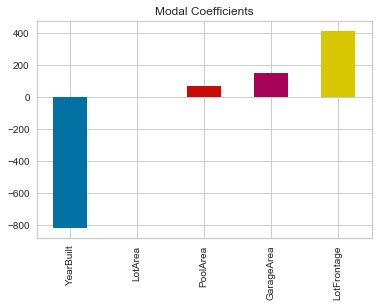

In [202]:
predictors_name = X_train.columns

coef = pd.Series(regression_model.coef_,predictors_name).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

# POLYNOMIAL REGRESSION


In [203]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)

#poly_features = PolynomialFeatures(degree=2,include_bias=False)



In [204]:
# Convert into polynomial features
X_train_poly = poly_features.fit_transform(X_train)

# Initialize model
poly_regression_model = linear_model.LinearRegression()

poly_regression_model.fit(X_train_poly, Y_train)

# Check trained model y-intercept
print(poly_regression_model.intercept_)

# Check trained model coefficients
print(poly_regression_model.coef_)

123109.69361156448
[ 4.36703081e-03 -8.65760251e-01  1.34635704e+02 -7.19568310e+02
 -2.04742085e+00 -4.51785683e+02 -2.41891860e-06 -1.24657641e-04
 -5.90567398e-06 -1.28935061e-04  2.32223332e-05  1.43502815e-01
  4.49017912e-01  1.89469557e-02 -6.26500577e+00 -1.86345026e+00
  6.85141334e-02  3.45155695e+01 -6.94266794e-05 -9.65804967e-02
  8.16620285e-01 -1.45663495e-03  1.95328787e-04 -1.98337652e-04
  1.10828116e-04 -2.05180996e-04  2.04528179e-03  4.14509410e-04
 -1.74177252e-04 -7.00033488e-05  7.09641079e-05  4.00669024e-04
 -2.43958362e-05  5.17201727e-07 -3.71306296e-04 -9.22704847e-06
 -2.74514059e-04  1.88557515e-03  2.51722503e-06  2.28757796e-04
 -6.11201385e-03 -6.51875444e-05 -2.63554952e-03 -5.75196211e-08
 -1.30743017e-04  4.56482278e-02  5.65392720e-02 -4.48458363e-04
 -2.20428700e-01 -2.26167685e-07  1.44465355e-03 -1.23365827e-01
  4.33765218e-10  1.83156203e-07  4.47052998e-04 -1.68864544e-02]


In [205]:
poly_regression_model.score(X = X_train_poly, y = Y_train)

0.6681105713074202

In [206]:
#predictors_name = X_train_poly.columns

#coef = pd.Series(poly_regression_model.coef_,predictors_name).sort_values()

#coef.plot(kind='bar', title='Modal Coefficients')

# SGD Regression


In [207]:
# Better to be used when training data > 10,000
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=1,eta0=0.1,penalty='l2')

sgd_reg.fit(X_train,Y_train)

sgd_reg.score(X = X_train, y = Y_train)

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


-7.392075131109091e+26

# RIDGE


In [208]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1,solver='cholesky')

ridge_reg.fit(X_train,Y_train)

ridge_reg.score(X = X_train, y = Y_train)

0.4980418289094676

# LASSO

In [209]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.2)

lasso_reg.fit(X_train,Y_train)

lasso_reg.score(X = X_train, y = Y_train)

0.4980418289095453

# ELASTICNET

In [210]:
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)

en_reg.fit(X_train,Y_train)

en_reg.score(X = X_train, y = Y_train)

0.498041828358807

# OUTLIER IDENTIFICATION 

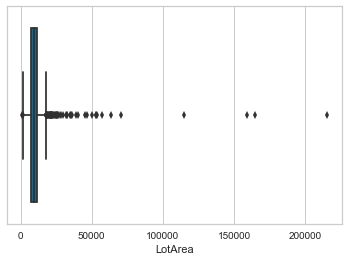

In [149]:
import seaborn as sns
attrList = ['GarageArea','PoolArea','LotFrontage','LotArea','YearBuilt','SalePrice']

# Finding outlier for LotArea 
# Using box plot 
sns.boxplot(x=trainData['LotArea'])

# 4 data points are extreme points 
# Can be considered either to remove
# or we can analyze more in details
# that why there is too high values 

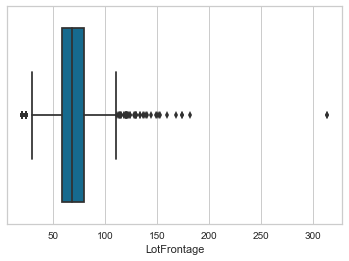

In [150]:
# Finding outlier for LotFrontage 
# Using box plot 
sns.boxplot(x=trainData['LotFrontage'])

# One data point which is greater than 300 is more 
# is one outlier 
# we can consider this data point to remove from dataset

In [151]:
trainData_set = trainData[['PoolArea','GarageArea','LotFrontage','LotArea','YearBuilt','SalePrice']] 



In [152]:
# Another way to use IQR
# Find Q & Q3 to get IQR

Q1 = trainData_set.quantile(0.25)
Q3 = trainData_set.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PoolArea           0.0
GarageArea       241.5
LotFrontage       21.0
LotArea         4048.0
YearBuilt         46.0
SalePrice      84025.0
dtype: float64


In [153]:
print(IQR.index)
for x in IQR.index:
    print(x,IQR[x])

Index(['PoolArea', 'GarageArea', 'LotFrontage', 'LotArea', 'YearBuilt',
       'SalePrice'],
      dtype='object')
PoolArea 0.0
GarageArea 241.5
LotFrontage 21.0
LotArea 4048.0
YearBuilt 46.0
SalePrice 84025.0


In [154]:
# For Lot Area
#  4048

print(IQR['LotArea'])

4048.0


In [155]:
# Findint minimum and max using magic number values
# here we are using 1.5 , can also be used some other values as well
# With IQR we can dettermine what should be outlier for each features 

print('Lower:',Q1 - 1.5 * IQR)
print('Upper:',Q3 + 1.5 * IQR)

Lower: PoolArea          0.00
GarageArea      -27.75
LotFrontage      27.50
LotArea        1481.50
YearBuilt      1885.00
SalePrice      3937.50
dtype: float64
Upper: PoolArea            0.00
GarageArea        938.25
LotFrontage       111.50
LotArea         17673.50
YearBuilt        2069.00
SalePrice      340037.50
dtype: float64


In [156]:
# Finding how man rows are ABOVE the outlier threshold
trainData_set['LotArea'].where( trainData_set['LotArea'] > 17700).count()

67

In [157]:
# Finding how man rows are LOWER the outlier threshold
trainData_set['LotArea'].where( trainData_set['LotArea'] < 1480).count()

2

In [211]:
# REMOVING ALL OUTLIER VALUES in one line of code
trainData_set_Out = trainData_set[~((trainData_set < (Q1 - 1.5 * IQR)) |
                                    (trainData_set > (Q3 + 1.5 * IQR))).any(axis=1)]

In [212]:
trainData_set_Out.info()
# ~ 200 data points were removed form data 
# i.e. 15% of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256 entries, 0 to 1459
Data columns (total 6 columns):
PoolArea       1256 non-null int64
GarageArea     1256 non-null int64
LotFrontage    1027 non-null float64
LotArea        1256 non-null int64
YearBuilt      1256 non-null int64
SalePrice      1256 non-null int64
dtypes: float64(1), int64(5)
memory usage: 68.7 KB


In [213]:
trainData_set.drop(trainData_set[trainData_set.LotArea > 17763].index,inplace=True)

In [214]:
trainData_set_Out['LotArea'].where( trainData_set_Out['LotArea'] > 17700).count()

0

In [215]:
#trainData_set_Out['LotArea'].where( X_train_Out['LotArea'] > 17700).count()

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20f758d0>,
      dtype=object)

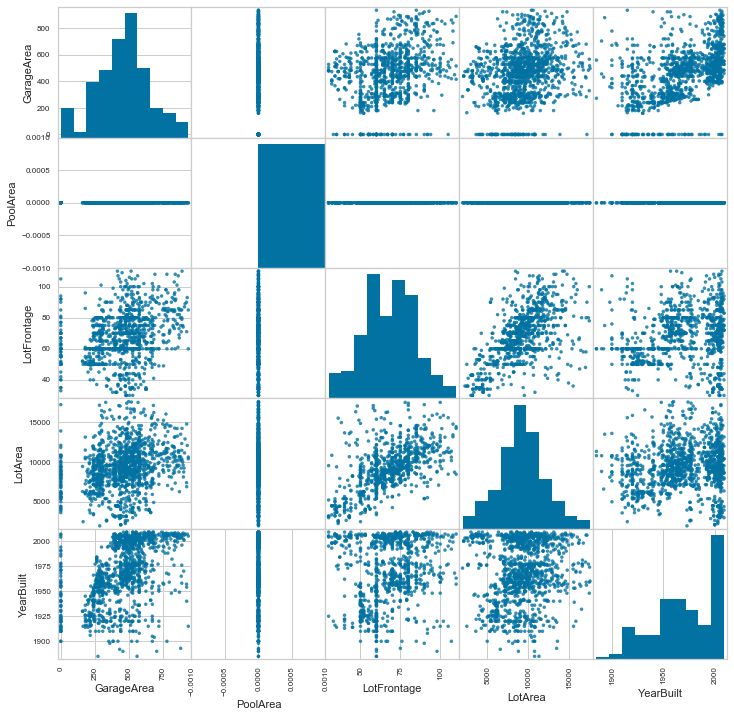

In [216]:
attr = ['GarageArea','PoolArea','LotFrontage','LotArea','YearBuilt']
scatter_matrix(trainData_set_Out[attr],alpha=0.8,figsize=(12,12))

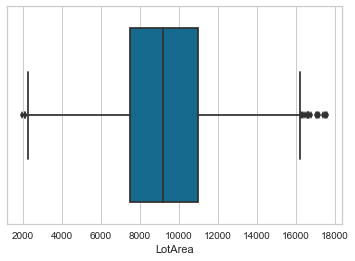

In [217]:
# Box plot after removing outlier
sns.boxplot(x=trainData_set_Out['LotArea'])

In [218]:

X_train_Out = trainData_set_Out[['PoolArea','GarageArea','LotFrontage','LotArea','YearBuilt']] 
Y_train_Out = trainData_set_Out[['SalePrice']]

X_train_Out['LotFrontage'].fillna(70,inplace=True)

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [219]:
poly_features_out = PolynomialFeatures(degree=4)

# Convert into polynomial features
X_train_poly_out = poly_features_out.fit_transform(X_train_Out)

# Initialize model
poly_regression_model_out = linear_model.LinearRegression()

poly_regression_model_out.fit(X_train_poly_out, Y_train_Out)

# Check trained model y-intercept
print(poly_regression_model_out.intercept_)

# Check trained model coefficients
print(poly_regression_model_out.coef_)

[-70095960.14249998]
[[ 3.16947655e-04 -1.43290354e+02 -3.66440867e-01 -3.74467396e+00
  -4.71455391e+00  8.78612395e-01  2.59790683e-01  8.84690836e-01
   6.13994186e-02 -3.45318599e-01  6.98503229e-02  9.25864696e+01
  -9.01956230e+00  9.85410936e+00 -5.28920002e+01 -2.53550885e+00
  -1.62723361e+02 -2.98851181e+01 -1.65866282e-01  5.28907182e+00
   1.23079093e+02 -3.69882813e-05  1.60248702e-05  9.11900159e-06
   2.03934195e-05  2.05924982e-06  3.33387758e-05 -1.64800434e-07
  -2.30042678e-06  4.66834786e-06 -4.71746455e-06  2.63663653e-06
  -1.97009776e-06 -2.17841506e-08 -4.62779731e-09 -5.01556703e-08
   1.83126936e-02  1.43840763e-01 -5.92688776e-04 -1.08873230e-01
  -3.17477252e-01 -2.70218739e-02  7.28448043e-02  1.50131823e-04
  -1.02647927e-02  5.55500496e-02  1.44119803e+01 -1.25946299e-01
  -7.59671509e-01  9.57613366e-05  1.77608209e-01  2.77213302e-02
   7.82944914e-07  1.42565075e-04 -5.49446382e-03 -8.82200345e-02
   3.75450782e-11  5.01501063e-11 -1.08002496e-12  3.05

In [220]:
poly_regression_model_out.score(X = X_train_poly_out, y = Y_train_Out)

0.6736199613057972

# K-Fold Cross validation

In [221]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

print(cross_val_score(poly_regression_model_out, X_train_poly_out, Y_train_Out, 
                      cv=5,scoring='r2')) 

[0.50003444 0.6411985  0.49842029 0.62147742 0.51861192]


# VALIDATION CURVE

If the training score and the validation score are both low, the estimator will be underfitting. 

If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well. 

A low training score and a high validation score is usually not possible. 

In [169]:
import numpy as np
np.logspace(-3, 1, 10)

array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])

In [171]:
from sklearn.model_selection import validation_curve

train_scores, valid_scores = validation_curve(Ridge(), X_train_poly_out, Y_train_Out, "alpha",
                                               np.logspace(-7, 3, 3),
                                               cv=5)

print('Train Score')
print(train_scores)
print('Valid Score')
print(valid_scores)

Train Score
[[0.7025966  0.68642698 0.69670232 0.69001393 0.69360058]
 [0.69034554 0.67569207 0.68620362 0.67665281 0.68342149]
 [0.68833753 0.67487444 0.68597579 0.67517154 0.68252268]]
Valid Score
[[0.59637231 0.65388642 0.55123649 0.62482043 0.53643509]
 [0.58737363 0.64207808 0.51268933 0.62799917 0.51111134]
 [0.59234881 0.64412338 0.51075988 0.63442764 0.52339711]]


/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.721193e-43
  overwrite_a=True).T
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.721193e-38
  overwrite_a=True).T
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.699546e-33
  overwrite_a=True).T
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Re

In [172]:
print(np.logspace(-7, 3, 3))

[1.e-07 1.e-02 1.e+03]


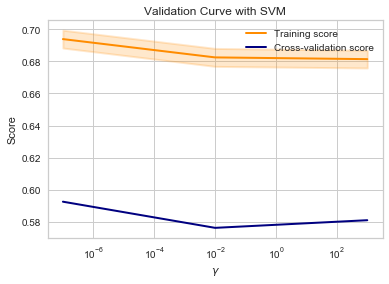

In [180]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

param_range = np.logspace(-7, 3, 3)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim = (0.5, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)

plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)

#plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                 test_scores_mean + test_scores_std, alpha=0.2,
#                 color="navy", lw=lw)

plt.legend(loc="best")
plt.show()

# LEARNING CURVE

In [113]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(poly_regression_model_out
                                                        ,y = Y_train_Out
                                                        ,X = X_train_poly_out
                                                        ,cv =5
                                                        ,scoring = 'r2'
                                                        ,train_sizes = np.linspace(0.3, 1.0, num=5)
                                                        #,train_sizes =[200,400,600,800,1000]
                                                       )
#neg_mean_squared_error

In [114]:
print(train_sizes)
print(train_scores)
print(test_scores)

[ 301  476  652  828 1004]
[[0.477955   0.71424038 0.71691129 0.71691129 0.71691129]
 [0.72194059 0.69411202 0.70239741 0.70239741 0.70239741]
 [0.71065247 0.68208283 0.69254735 0.67350692 0.67350692]
 [0.69090842 0.67630597 0.68481524 0.67962394 0.67544863]
 [0.64109523 0.67322675 0.68070298 0.67381702 0.68071198]]
[[-3.07445466  0.40183697 -0.95639452 -0.76611777 -0.44371949]
 [ 0.49095308  0.60371586 -0.01200768  0.28357387  0.35377955]
 [ 0.4989347   0.6468703   0.48593803  0.34143101  0.25828952]
 [ 0.55458823  0.64286494  0.56881185  0.61615801  0.44398275]
 [ 0.50003444  0.64209716  0.45394262  0.62680308  0.51613857]]


[0.66858585 0.70464897 0.6864593  0.68142044 0.66991079]
[-0.96776989  0.34400294  0.44629271  0.56528116  0.54780317]


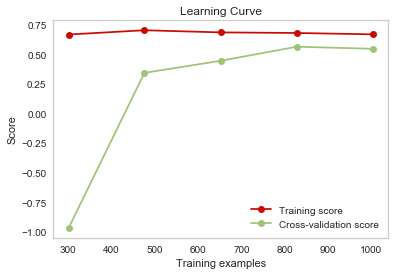

In [115]:
    plt.figure()
    #ylim=None
    plt.ylim = (-1,1)
    plt.title('Learning Curve')
    #if ylim is not None:
     #   plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    #plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
     #                train_scores_mean + train_scores_std, alpha=0.1,
      #               color="r")
    #plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
     #                test_scores_mean + test_scores_std, alpha=0.1, color="g")
    print(train_scores_mean)
    print(test_scores_mean)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [106]:
from sklearn.model_selection import KFold

cv = KFold(5)

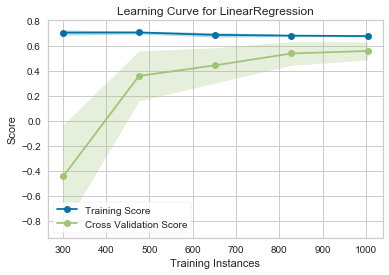

In [116]:
from yellowbrick.model_selection import LearningCurve
#poly_regression_model_out.score(X = X_train_poly_out, y = Y_train_Out)
viz = LearningCurve(
    poly_regression_model_out, cv = cv, train_sizes=np.linspace(0.3, 1.0, num=5),
    scoring='r2', n_jobs=4
)

# Fit and poof the visualizer
viz.fit(X = X_train_poly_out, y = Y_train_Out)
viz.poof()

In [50]:
np.linspace(.2, 1.5, num=5)

array([0.2  , 0.525, 0.85 , 1.175, 1.5  ])

In [39]:
from sklearn import svm

#trainData['LotArea']
X_train = trainData[['Id','LotArea']] 

# X_train = trainData[['PoolArea','GarageArea','LotFrontage','LotArea','YearBuilt']] 

In [43]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

# out = clf.fit_predict(np.array(X_train['LotArea']).reshape(-1,1))

clf1 = clf.fit(X_train)

In [44]:
out = clf1.predict(X_train)

In [42]:
print( X_train )

        Id  LotArea
0        1     8450
1        2     9600
2        3    11250
3        4     9550
4        5    14260
5        6    14115
6        7    10084
7        8    10382
8        9     6120
9       10     7420
10      11    11200
11      12    11924
12      13    12968
13      14    10652
14      15    10920
15      16     6120
16      17    11241
17      18    10791
18      19    13695
19      20     7560
20      21    14215
21      22     7449
22      23     9742
23      24     4224
24      25     8246
25      26    14230
26      27     7200
27      28    11478
28      29    16321
29      30     6324
...    ...      ...
1430  1431    21930
1431  1432     4928
1432  1433    10800
1433  1434    10261
1434  1435    17400
1435  1436     8400
1436  1437     9000
1437  1438    12444
1438  1439     7407
1439  1440    11584
1440  1441    11526
1441  1442     4426
1442  1443    11003
1443  1444     8854
1444  1445     8500
1445  1446     8400
1446  1447    26142
1447  1448    10000


In [45]:
print(out)

[ 1  1  1 ...  1 -1 -1]


In [50]:
#print(clf1.predict( np.array(50).reshape(-1,1) ))